In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load CIFAR-10
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalisasi
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Split train jadi train + validation (4:1)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

print("Train:", x_train.shape)
print("Validation:", x_val.shape)
print("Test:", x_test.shape)

Train: (40000, 32, 32, 3)
Validation: (10000, 32, 32, 3)
Test: (10000, 32, 32, 3)


In [10]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))  # CIFAR-10 → 10 kelas

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))  # CIFAR-10 → 10 kelas

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
model3 = models.Sequential()
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))  # CIFAR-10 → 10 kelas
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
def train_model(model):
    history = model.fit(
        x_train, y_train,
        epochs=20,
        validation_data=(x_val, y_val),
        batch_size=64,
        verbose = 1
    )
    return history

In [14]:
history1 = train_model(model1)
history2 = train_model(model2)
history3 = train_model(model3)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2003 - loss: 2.0665 - val_accuracy: 0.3882 - val_loss: 1.6355
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3989 - loss: 1.6007 - val_accuracy: 0.4407 - val_loss: 1.5008
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4452 - loss: 1.4967 - val_accuracy: 0.4558 - val_loss: 1.4726
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4724 - loss: 1.4227 - val_accuracy: 0.4739 - val_loss: 1.4483
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4920 - loss: 1.3726 - val_accuracy: 0.4927 - val_loss: 1.3785
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5036 - loss: 1.3455 - val_accuracy: 0.5037 - val_loss: 1.3477
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5166 - loss: 1.3034 - val_accuracy: 0.5025 - val_loss: 1.3484
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5265 - loss: 1.2725 - val_accu

In [15]:
# Prediksi test set
def predict_with(model):

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Flatten label test karena aslinya (10000,1)
    y_test_flat = y_test.flatten()

    # Hitung Macro F1
    macro_f1 = f1_score(y_test_flat, y_pred_classes, average='macro')
    print("Macro F1-Score on Test Set:", macro_f1)

In [16]:
predict_with(model1)
predict_with(model2)
predict_with(model3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Macro F1-Score on Test Set: 0.5817859396133345
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Macro F1-Score on Test Set: 0.6327341050742965
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Macro F1-Score on Test Set: 0.6305663193832487


In [17]:
import matplotlib.pyplot as plt

def plot_loss_histories(histories, labels):
    """Membuat grafik training dan validation loss dari beberapa riwayat pelatihan.

    Args:
        histories (list): Daftar objek History (hasil dari model.fit).
        labels (list): Daftar label yang sesuai untuk setiap riwayat.

    Returns:
        None (menampilkan grafik)
    """

    # Grafik Training Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, grafik pertama
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=label)
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Grafik Validation Loss
    plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, grafik kedua
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=label)
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()  # Menyesuaikan tata letak agar tidak tumpang tindih
    plt.show()

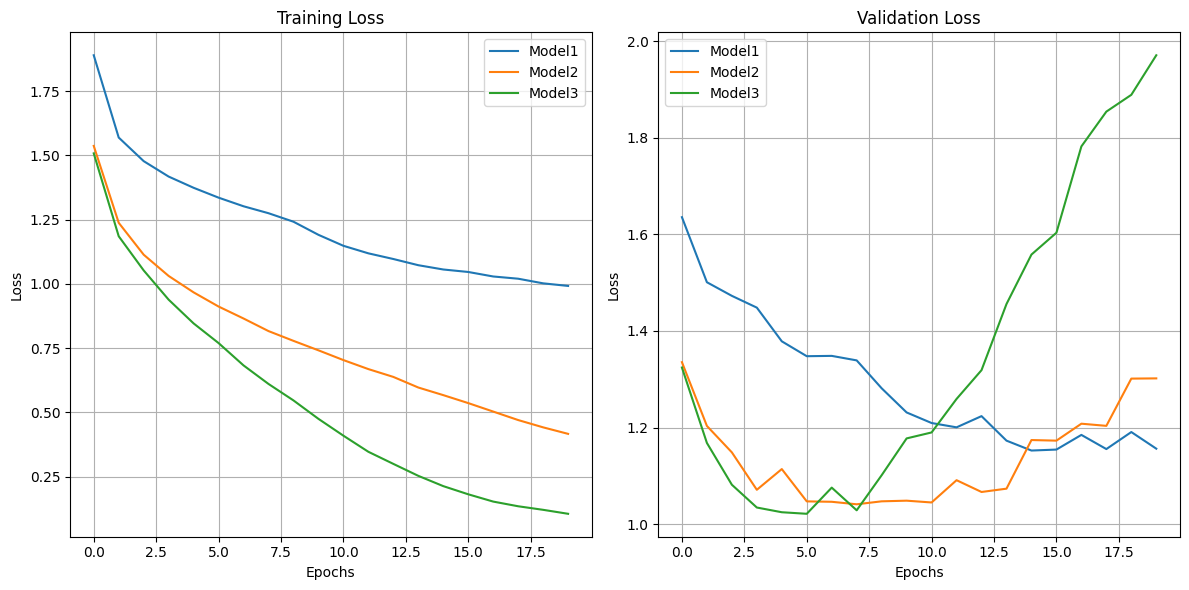

In [18]:
plot_loss_histories([history1,history2,history3],['Model1','Model2','Model3'])